In [2]:
import pandas as pd 

In [3]:
heart_disease_data = pd.read_csv('Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County.csv')



In [4]:
heart_disease_data.head()

,Year,LocationAbbr,LocationDesc,GeographicLevel,DataSource,Class,Topic,Data_Value,Data_Value_Unit,Data_Value_Type,Data_Value_Footnote_Symbol,Data_Value_Footnote,StratificationCategory1,Stratification1,StratificationCategory2,Stratification2,TopicID,LocationID,Location 1
0,2014,AK,Aleutians East,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,105.3,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2013,"(55.440626, -161.962562)"
1,2014,AK,Aleutians West,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,211.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2016,"(52.995403, -170.251538)"
2,2014,AK,Anchorage,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,257.9,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2020,"(61.159049, -149.103905)"
3,2014,AK,Bethel,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,351.6,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",NaN,NaN,Gender,Overall,Race/Ethnicity,Overall,T2,2050,"(60.924483, -159.749655)"
4,2014,AK,Bristol Bay,County,NVSS,Cardiovascular Diseases,Heart Disease Mortality,NaN,"per 100,000 population","Age-adjusted, Spatially Smoothed, 3-year Avera...",~,Insufficient Data,Gender,Overall,Race/Ethnicity,Overall,T2,2060,"(58.754192, -156.694709)"


The dataset provides information about heart disease mortality rates among U.S. adults by state, territory, and county. Here's a quick summary of the columns:

- Year: Year of the recorded data
- LocationAbbr: Abbreviation of the state/territory
- LocationDesc: Name of the county or state
- GeographicLevel: Indicates whether the data is at the county or state level
- DataSource: Source of the data
- Class: Health condition category
- Topic: Specific health condition (heart disease mortality)
- Data_Value: Mortality rate per 100,000 population
- Data_Value_Unit: Unit of measurement (per 100,000 population)
- Data_Value_Type: Type of data value (e.g., age-adjusted)
- StratificationCategory1 and Stratification1: First stratification category (e.g., Gender)
- StratificationCategory2 and Stratification2: Second stratification category
- TopicID: Unique ID for the topic
- LocationID: Unique ID for the location
- Location 1: Geographic coordinates

In [5]:
#Checking for missing values in each column
missing_values_summary = heart_disease_data.isnull().sum()

#missing values summary
missing_values_summary

Year                              0
LocationAbbr                      0
LocationDesc                      0
GeographicLevel                   0
DataSource                        0
Class                             0
Topic                             0
Data_Value                    26927
Data_Value_Unit                   0
Data_Value_Type                   0
Data_Value_Footnote_Symbol    32149
Data_Value_Footnote           32149
StratificationCategory1           0
Stratification1                   0
StratificationCategory2           0
Stratification2                   0
TopicID                           0
LocationID                        0
Location 1                       18
dtype: int64

The summary of missing values indicates some potential data issues:

- Data_Value: 26,927 missing entries in the main data column for heart disease mortality rates.
- Data_Value_Footnote and Data_Value_Footnote_Symbol: Over 32,000 missing values.
- Location 1: 18 missing values for geographic coordinates.

In [6]:
#Removing rows where 'Data_Value' is missing
cleaned_data = heart_disease_data.dropna(subset=['Data_Value'])

#Droping the footnote columns as they are non-essential for analysis
cleaned_data = cleaned_data.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'])

#Removing rows with missing 'Location 1' values
cleaned_data = cleaned_data.dropna(subset=['Location 1'])

#summary of missing values after cleaning
cleaned_missing_values_summary = cleaned_data.isnull().sum()

#first few rows of the cleaned data
cleaned_data_preview = cleaned_data.head()

(cleaned_missing_values_summary, cleaned_data_preview)

(Year                       0
 LocationAbbr               0
 LocationDesc               0
 GeographicLevel            0
 DataSource                 0
 Class                      0
 Topic                      0
 Data_Value                 0
 Data_Value_Unit            0
 Data_Value_Type            0
 StratificationCategory1    0
 Stratification1            0
 StratificationCategory2    0
 Stratification2            0
 TopicID                    0
 LocationID                 0
 Location 1                 0
 dtype: int64,
    Year LocationAbbr    LocationDesc GeographicLevel DataSource  \
 0  2014           AK  Aleutians East          County       NVSS   
 1  2014           AK  Aleutians West          County       NVSS   
 2  2014           AK       Anchorage          County       NVSS   
 3  2014           AK          Bethel          County       NVSS   
 5  2014           AK          Denali          County       NVSS   
 
                      Class                    Topic  Data_Value 

The data has been cleaned with these results:

- Missing Values: All columns now have zero missing values.
- Preview: The first five rows of the cleaned dataset are displayed.

This section addresses missing data and removes unnecessary columns to prepare the dataset for analysis. Specific steps include:

1. Removing rows with missing 'Data_Value', which represents heart disease mortality rates.
2. Dropping footnote columns as they are non-essential and predominantly null.
3. Ensuring all locations have valid geographic coordinates.

(count    32131.000000
 mean       349.333444
 std        140.565560
 min          6.000000
 25%        253.400000
 50%        340.000000
 75%        433.800000
 max       3000.900000
 Name: Data_Value, dtype: float64,
 <module 'matplotlib.pyplot' from '/Users/sheyambitar/opt/anaconda3/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

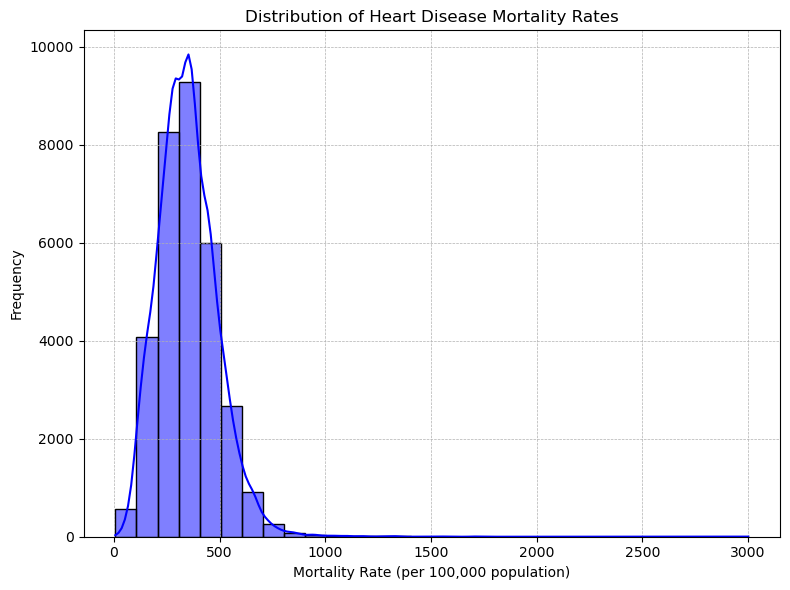

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Summary statistics of mortality rates
summary_statistics = cleaned_data['Data_Value'].describe()

#Plot distribution of mortality rates
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['Data_Value'], kde=True, bins=30, color='blue')
plt.title('Distribution of Heart Disease Mortality Rates')
plt.xlabel('Mortality Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.tight_layout()

#summary statistics
(summary_statistics, plt)


This histogram visualizes the distribution of heart disease mortality rates across the dataset. Observing the spread and concentration of data points helps identify outliers and understand the general pattern of heart disease impacts across different regions.


Summary Statistics of Heart Disease Mortality Rates

- Count: 32,131 data points
- Mean: 349.33 deaths per 100,000 population
- Standard Deviation: 140.57
- Minimum: 6.0
- 25th Percentile (Q1): 253.4
- Median (Q2/50th Percentile): 340.0
- 75th Percentile (Q3): 433.8
- Maximum: 3,000.9

The distribution plot shows that the majority of mortality rates are concentrated between 100 and 600 deaths per 100,000 people. There are a few outliers above 1,000.



#Summary Statistics

These statistics provide a quantitative overview of the heart disease mortality rates:
- **Mean**: Average mortality rate, indicating the general level of heart disease deaths.
- **Standard Deviation**: Shows variability of mortality rates from the mean.
- **Percentiles**: Help understand the distribution of data beyond the average.


Data_Value                                1.000000
Stratification1_Male                      0.407408
Stratification2_Black                     0.270607
LocationAbbr_MS                           0.166503
LocationAbbr_OK                           0.128456
                                            ...   
Stratification1_Female                   -0.347253
Stratification2_Hispanic                 -0.348513
Year                                           NaN
StratificationCategory1_Gender                 NaN
StratificationCategory2_Race/Ethnicity         NaN
Name: Data_Value, Length: 72, dtype: float64

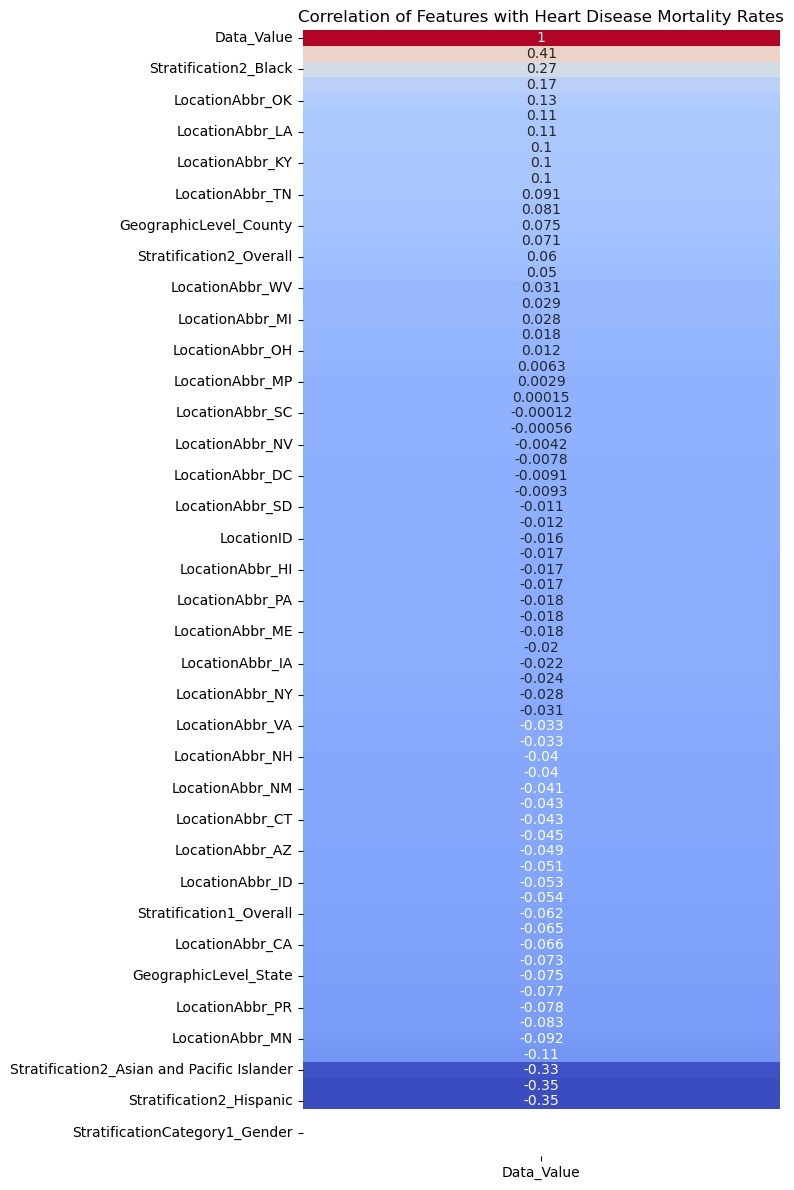

In [8]:
#Encoding categorical features as one-hot vectors for correlation analysis
encoded_data = pd.get_dummies(cleaned_data, columns=['LocationAbbr', 'GeographicLevel', 'StratificationCategory1', 'Stratification1', 'StratificationCategory2', 'Stratification2'])

#Calculating the correlation matrix
correlation_matrix = encoded_data.corr()

#Extract correlations with the target variable (Data_Value)
correlations_with_target = correlation_matrix['Data_Value'].sort_values(ascending=False)

#the top correlations
plt.figure(figsize=(8, 12))
sns.heatmap(correlations_with_target.to_frame(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation of Features with Heart Disease Mortality Rates')
plt.tight_layout()

#top correlations
correlations_with_target


Correlation Analysis Results:

The correlation heatmap and sorted values indicate the relationship between different features and the heart disease mortality rate (Data_Value). Here are a few significant correlations:

- Stratification1_Male: Positive correlation of 0.41, indicating that male gender is associated with higher mortality rates.
- Stratification2_Black: Positive correlation of 0.27, showing that mortality rates are higher among Black populations.
- LocationAbbr_MS (Mississippi): Positive correlation of 0.17, suggesting higher mortality rates in Mississippi.
- Stratification1_Female: Negative correlation of -0.35, indicating lower mortality rates among females.
- Stratification2_Hispanic: Negative correlation of -0.35, reflecting lower mortality rates among Hispanic populations.


Observations:
Some features have no significant correlations (e.g., Year).
Geographic regions and demographic factors appear to influence heart disease mortality rates.
Features related to gender and race/ethnicity provide important insights for further modeling.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
# Cleaning steps
cleaned_data = heart_disease_data.dropna(subset=['Data_Value'])
cleaned_data = cleaned_data.drop(columns=['Data_Value_Footnote_Symbol', 'Data_Value_Footnote'])
cleaned_data = cleaned_data.dropna(subset=['Location 1'])

In [11]:
# One-hot encoding for categorical columns
encoded_data_full = pd.get_dummies(cleaned_data, drop_first=True)

In [12]:
# Define features and target
X = encoded_data_full.drop(columns=['Data_Value'])
y = encoded_data_full['Data_Value']

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Reduced model complexity for quicker iterations
rf_model = RandomForestRegressor(
    n_estimators=20,   # Reduced from 50
    max_depth=6,       # Slightly increased from 5 for better performance
    min_samples_leaf=6,  # Adding more samples per leaf
    n_jobs=-1,          # Utilize all CPU cores
    random_state=42
)


In [16]:
rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=6, min_samples_leaf=6, n_estimators=20,
                      n_jobs=-1, random_state=42)

In [19]:
# Make predictions and evaluate the model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)



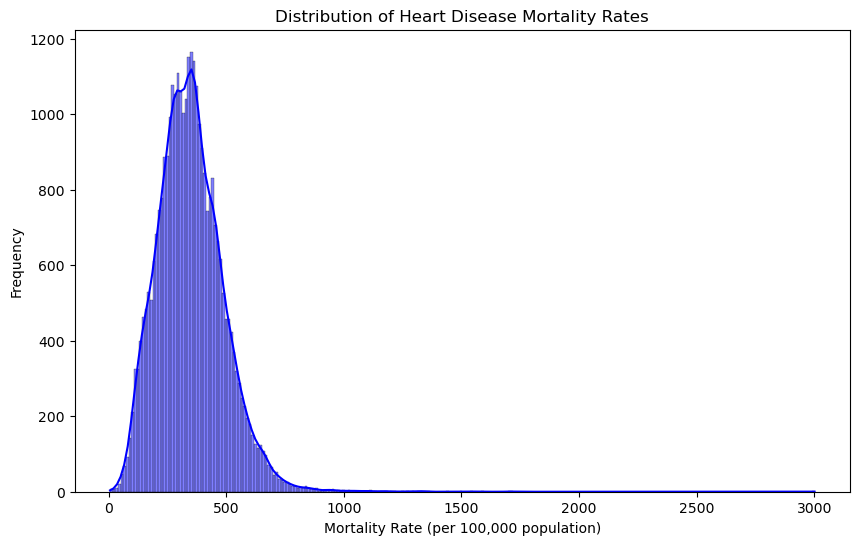

Mean Squared Error: 9293.959799922432
R2 Score: 0.5382032053203887


In [23]:
# Visualization: Distribution of Heart Disease Mortality Rates
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Data_Value'], kde=True, color='blue')
plt.title('Distribution of Heart Disease Mortality Rates')
plt.xlabel('Mortality Rate (per 100,000 population)')
plt.ylabel('Frequency')
plt.show()

# Print model evaluation
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

### Model Evaluation Metrics

- **Mean Squared Error (MSE)**: Represents the average of the squares of the errors—i.e., the average squared difference between the estimated values and the actual value.
- **R2 Score**: Indicates how well the regression predictions approximate the real data points. An R2 score of 1 indicates perfect alignment.


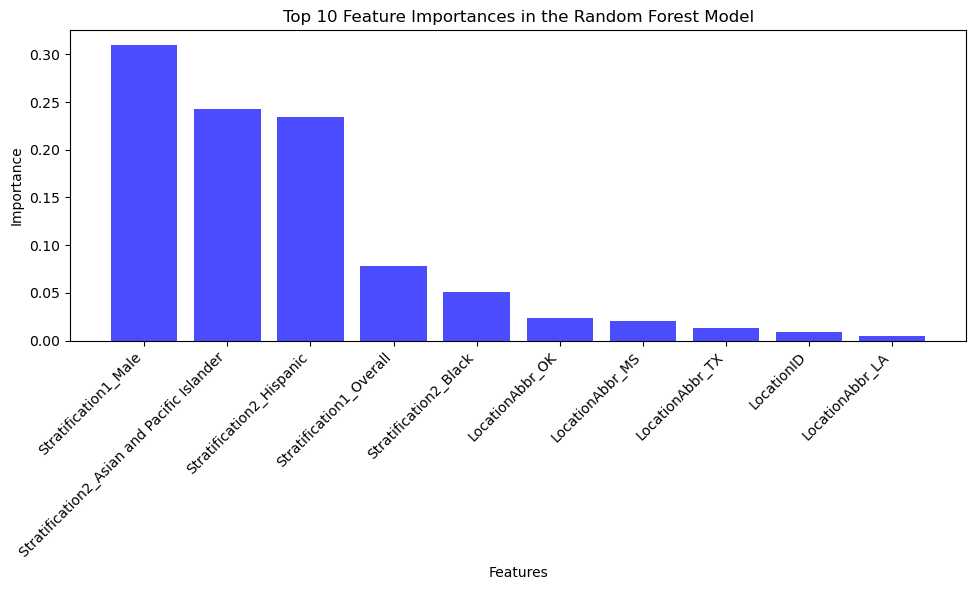

In [30]:
import numpy as np
# Plot feature importances
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Reduce the number of features to plot for clarity
top_n = 10  # Number of top features to plot
top_indices = indices[:top_n]  # Indices of top n features

plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importances in the Random Forest Model')
plt.bar(range(top_n), importances[top_indices], align='center', color='blue', alpha=0.7)
plt.xticks(range(top_n), X_train.columns[top_indices], rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

In [32]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.8/458.8 kB 1.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


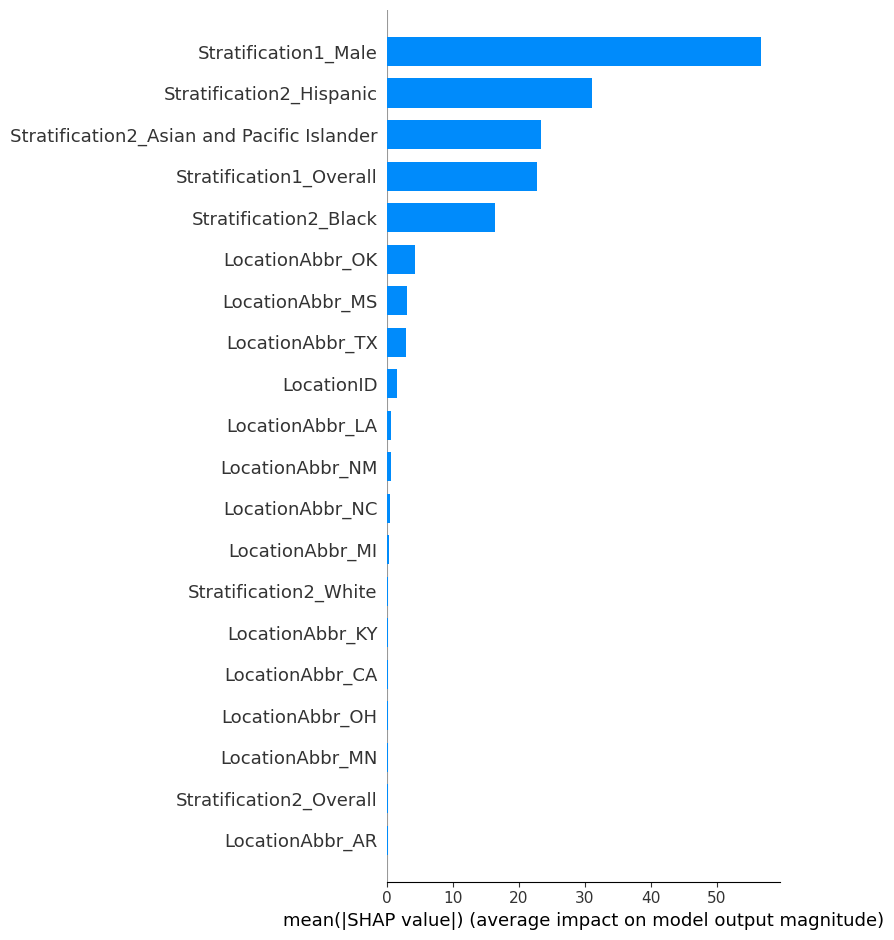

In [33]:
import shap

# Create the explainer - assuming rf_model is your trained Random Forest model
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train)

# Plot summary plot using SHAP values
shap.summary_plot(shap_values, X_train, plot_type="bar")

### SHAP Values Analysis

SHAP (SHapley Additive exPlanations) values depict the impact of each feature on the model's predictions. This analysis helps us understand which features drive the model's decisions, providing insights into the causal relationships within the data.


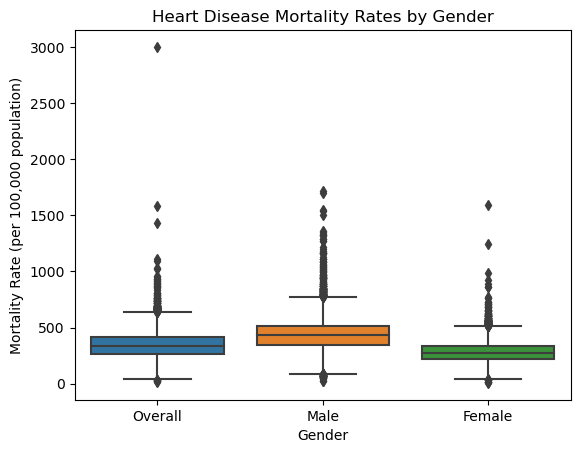

In [27]:
# Boxplot of Mortality Rates by Gender
sns.boxplot(x='Stratification1', y='Data_Value', data=cleaned_data)
plt.title('Heart Disease Mortality Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.show()


### Mortality Rates by Gender

This boxplot compares heart disease mortality rates across genders. It highlights any disparities between different genders, which can be crucial for targeted healthcare interventions.


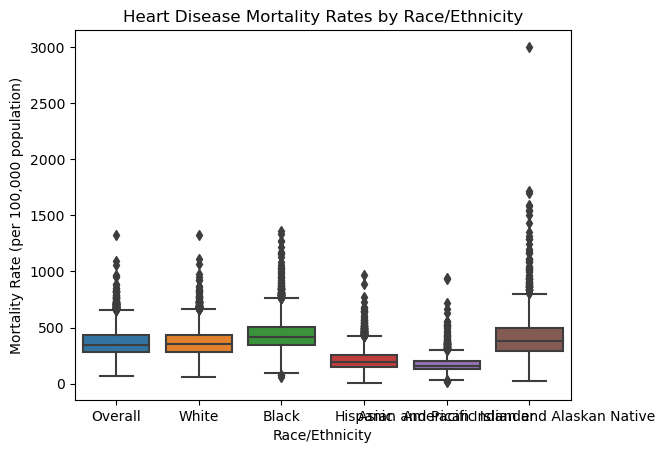

In [28]:
# Boxplot of Mortality Rates by Race/Ethnicity
sns.boxplot(x='Stratification2', y='Data_Value', data=cleaned_data)
plt.title('Heart Disease Mortality Rates by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Mortality Rate (per 100,000 population)')
plt.show()

### Mortality Rates by Race/Ethnicity

This boxplot examines how heart disease mortality rates vary across different racial and ethnic groups. Identifying disparities can help in developing focused public health policies and practices.
